# Task 6 Prediction using Decision Tree Algorithm

## Damian Lourdes

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [3]:
class_count=3
plot_colors='brg'
markers='ovs'
plot_res=0.01


In [4]:
iris=load_iris()

Let us now go about applying the decision tree model in a pairwise fashion to the available features to see some simple applications of how decision trees can assign classifications to individual samples. Since the data set is small and we aren't concerned today with validation, we won't bother with a train-test split.

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

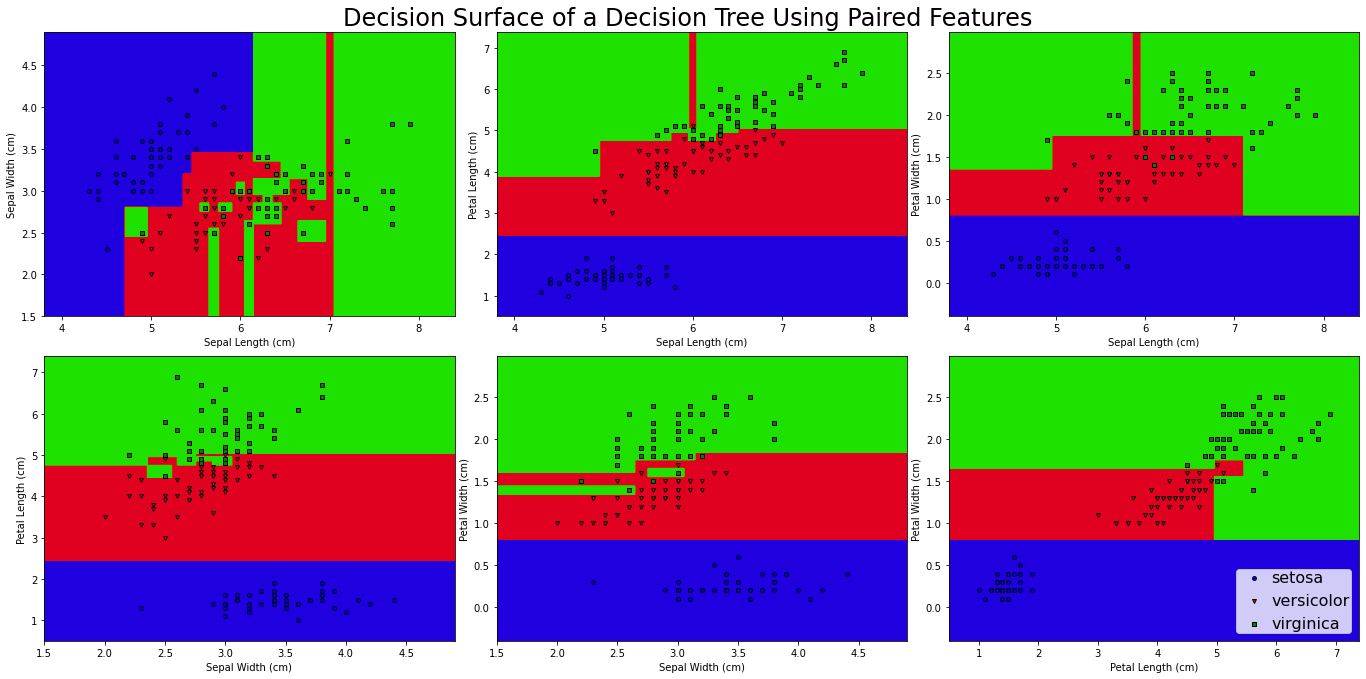

In [5]:
plt.figure(figsize=(20,10))
models=[]
for pair_index,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X,y=iris.data[:,pair],iris.target
    model=DecisionTreeClassifier().fit(X,y)
    models.append(model)
    plt.subplot(2, 3, pair_index + 1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
        
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    

    for i, color, marker in zip(range(class_count), plot_colors, markers):
        index = np.where(y == i)
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )

plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24               
)

plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

plt.axis("tight")
             
        

Note that in the above plots, there are occasionally generated small islands or peninsulae of classification which show us the Achilles' heel of Decision tree models: their tendency to overfit the data. While these small cutouts improve the accuracy of the model on the training data, they also result in a model that applies increasingly implausible critera to the data which likely won't stand up when new data is used to test the model.

It is also interesting to note that with only two parameters available, a very high degree of accuracy is achievable in the last subplot using only petal length and petal, width with only a single modest and sensibly positioned peninsula.

We'll come back to this last subplot at the end of this posting.

The very short and simple code below shows the results of a decision tree model when all four parameters are considered via the plot_tree() function. As it turns out, only two parameters, petal length (X[2]) and petal width (X[3]), are needed to provide a very high degree of accuracy, yielding results very similar to what is achieved when considering only two parameters. The X[1] parameter for sepal width is also brought to bear to make the finest distinctions, but ultimately doesn't bring much value.

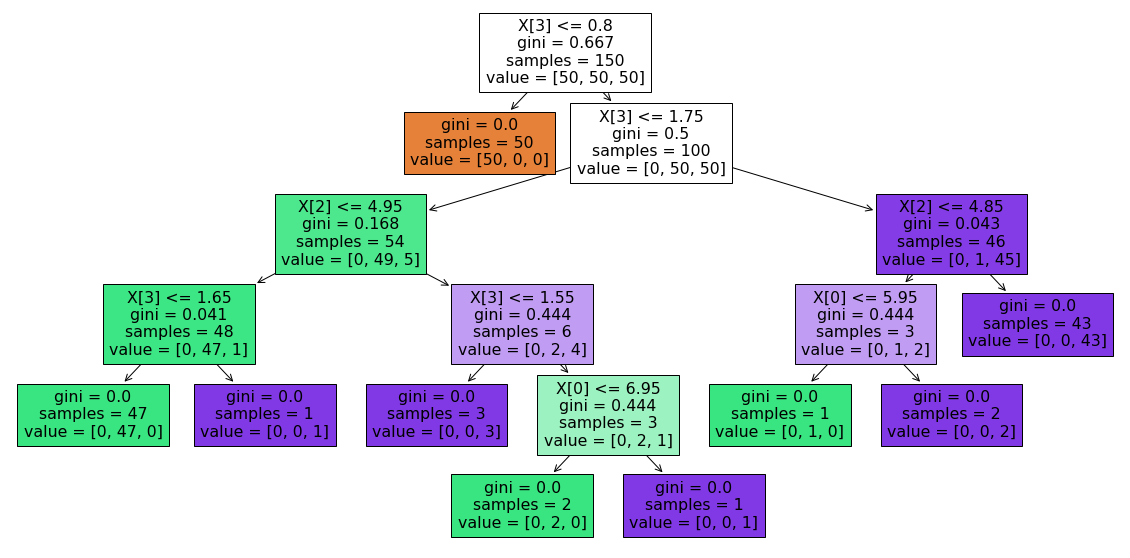

In [6]:
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
plt.figure(figsize = (20,10))
plot_tree(model_all_params, 
          filled=True      )
plt.show()

We may very simply add the max_depth parameter to the model with a value of 3 and observe the effect of forcing some simplicity on the tree, akin to pruning all the smallest branches of a tree down to a few points of divergence closest to the trunk.

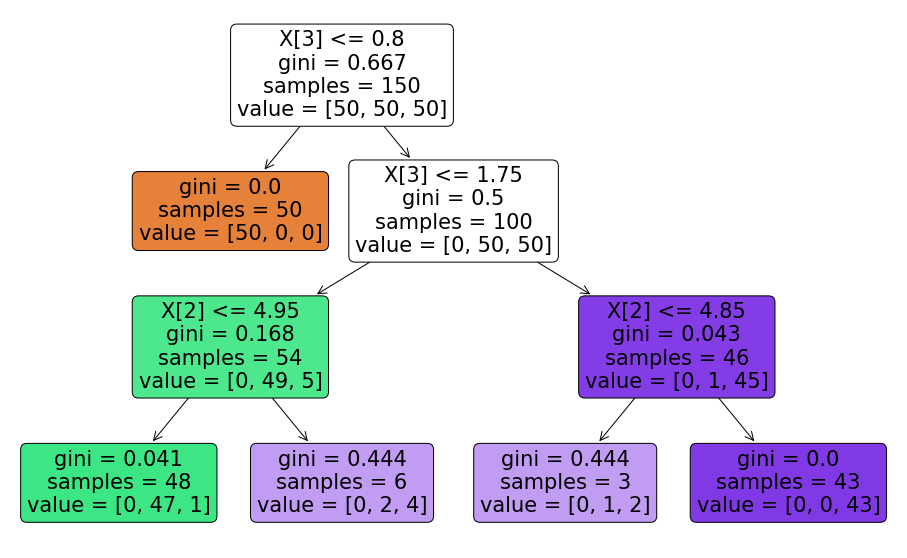

In [7]:
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)
plt.figure(figsize = (16,10))
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
plt.show()

This leaves us with only four misclassified points by applying a total of four tests, and trimming one level sooner, i.e., setting max_depth to 2, would only have six errors out of the 150 points.

Another approach we might consider is to mandate that there must be a significant increase in impurity for the split to occur. Setting the min_impurity_decrease parameter will allow us to restrict splits to those that significantly improve the results of the overal model behavior.

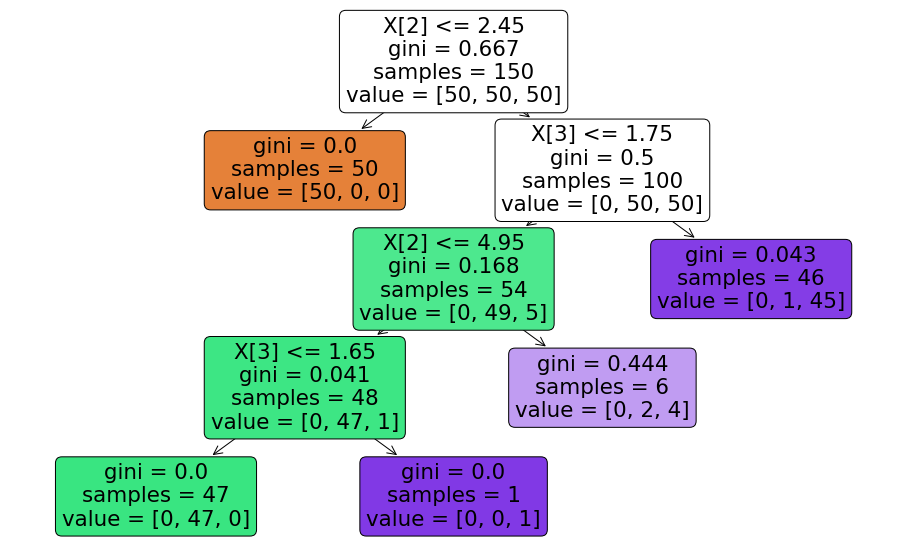

In [8]:
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(iris.data, iris.target)
plt.figure(figsize = (16,10))
plot_tree(model_all_params_min_imp_dec_001,
          rounded = True,
          filled = True                )
plt.show()

This approach gets us to three misclassified points out of 150 with the same number of tests as before with max_depth = 3, but we are now able to apply the questions a bit more efficiently.

Having made this improvement using the full dataset, let's now circle back to that last subplot which also used only petal length and petal width and see how it shows in plot_tree().

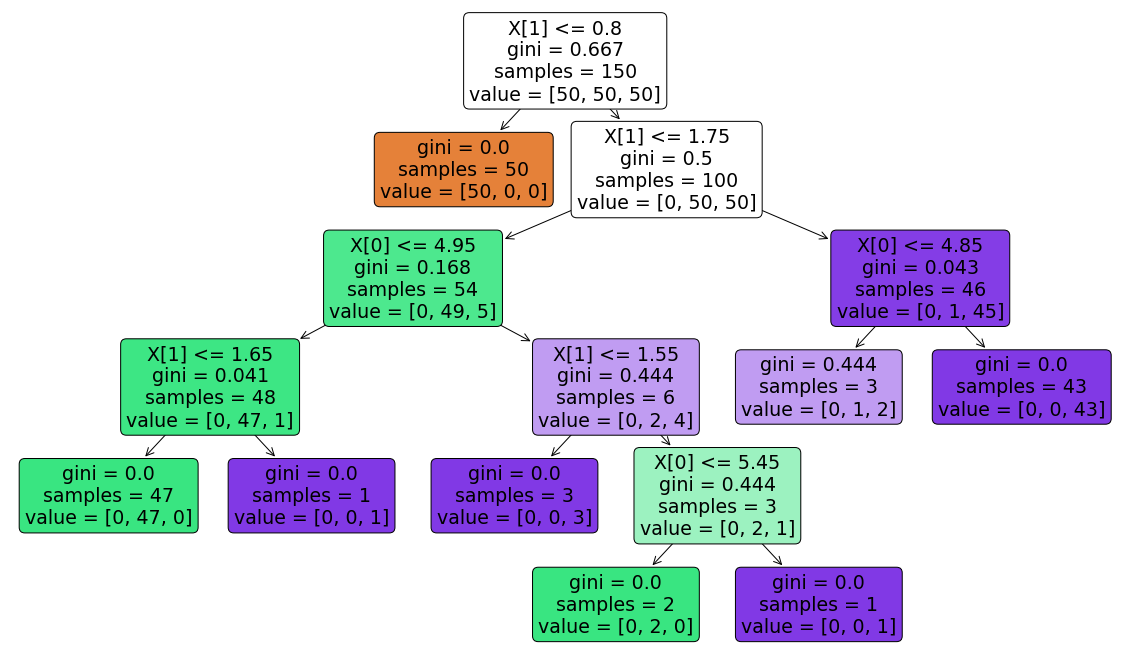

In [9]:
plt.figure(figsize = (20,12))
plot_tree(models[5],
          rounded = True,
          filled = True  )
plt.show()

Seven conditionals to yield only one misclassified sample out of 150 using only the two most important features out of the four available